# Assignment Ten

### Due Saturday May 4th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

In [2]:
#1a. 
def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        
    print "A root of f(x) is: %1.15f" %x1

In [3]:
#1a - Continued
f = lambda x: x*np.cos(x)-(np.sin(x))**2
fp = lambda x: np.cos(x) - x*np.sin(x) - 2*np.sin(x)*np.cos(x)
xvals = np.linspace(0, 5, int(1e5)+1)
yvals = f(xvals)
zvals = np.zeros(xvals.size)

In [4]:
#1a - Continued
Newtons_method(f, fp, .05, 1e-6)
Newtons_method(f, fp, .5, 1e-6)
Newtons_method(f, fp, 4.5, 1e-6)

A root of f(x) is: 0.000000000000000
A root of f(x) is: 0.846446354857407
A root of f(x) is: 4.909534391393061


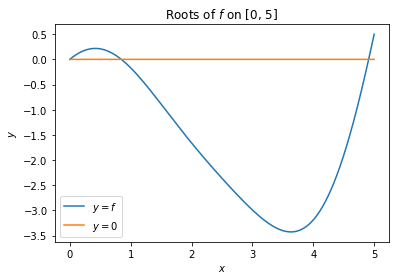

In [16]:
#1a - Continued
plt.plot(xvals, yvals, label = '$y = f$')
plt.plot(xvals, zvals, label = '$y = 0$')
plt.title('Roots of $f$ on [0, 5]')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [6]:
#1b.
def convergence_plotter(cvals):
    clen = cvals.size
    cstr = cvals[clen-1]
    xvals = np.ma.log10(np.abs(cvals[:clen-3] - cstr))
    yvals = np.ma.log10(np.abs(cvals[1:clen-2] - cstr))
    ylen = yvals.size
    plt.plot(xvals,yvals,'*')
    slopes = (yvals[1:]-yvals[:ylen-1])/(xvals[1:]-xvals[:ylen-1])
    print 'The computed value of the maximum slope is %.15f'%np.max(slopes)
    print 'The computed value of the minimum slope is %.15f'%np.min(slopes)
    print 'The average value of the computed slope is %.15f'%np.mean(slopes)

In [7]:
#1b. - Continued 
def modified_newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    
    cAprroxmations = np.array([x1])
    
    while np.abs(x1-x0):
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        cAprroxmations = np.append(cAprroxmations, x1)
    
    convergence_plotter(cAprroxmations)
        
    print "A root of f(x) is: %1.15f" %x1

The computed value of the maximum slope is 1.999997888626942
The computed value of the minimum slope is 1.998507722980205
The average value of the computed slope is 1.999252805803573
A root of f(x) is: 0.000000000000000


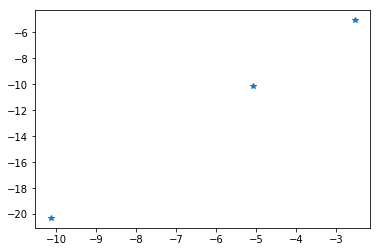

In [8]:
modified_newtons_method(f, fp, .05, 1e-6)

The computed value of the maximum slope is 1.996963624508188
The computed value of the minimum slope is 1.330417235053937
The average value of the computed slope is 1.749361254515605
A root of f(x) is: 0.846446354857407


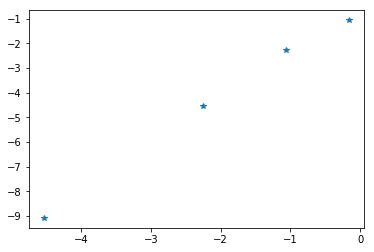

In [9]:
modified_newtons_method(f, fp, .5, 1e-6)

The computed value of the maximum slope is 1.999376285002905
The computed value of the minimum slope is 1.944860562654473
The average value of the computed slope is 1.972118423828689
A root of f(x) is: 4.909534391393061


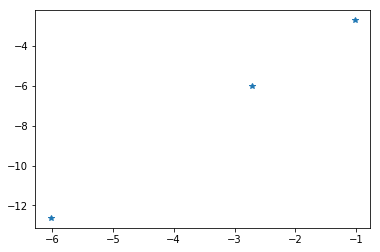

In [10]:
modified_newtons_method(f, fp, 4.5, 1e-6)

**Problem 2** : (10 pts) Using Newton's method, explain why the sequence 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
converges to $\sqrt{A}$ (4 pts).  Hint, you need to think of a function whose root is $\sqrt{A}$.  Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

$$
\begin{align}
& f(x_{n}) = x^{2}_{n} - A \implies f'(\sqrt{A}) = 0 \\
& f'(x_{n}) = 2x_{n} \\
& f(x_{n-1}) = x^{2}_{n-1} - A \\
& f'(x_{n-1}) = 2x_{n-1} \\
\end{align}
$$

$$
\begin{align}
& x_{n} = x_{n-1} - \frac{x^{2}_{n-1}- A}{2x_{n-1}} \\
& = x_{n-1} - \frac{x^{2}_{n-1}}{2x_{n-1}} + \frac{A}{2x_{n-1}} \\
& = x_{n-1} - \frac{x_{n-1}}{2_{n-1}} + \frac{A}{2x_{n-1}} \\
& = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}} \\
\end{align}
$$

In [11]:
def sequence_of_x_of_n(x0, A, tol):
    n = 0.
    while np.max(np.abs(x0**2 - A)) >= tol:
        xn = 1./2.*((x0) + float(A)/x0)
        n += 1.
        x0 = xn
    print "The sequence convegers to " + str(xn) + " (square-root of A). "
    print "It takes " + str(n) + " iterations to converge to the square-root of A."

In [12]:
sequence_of_x_of_n(5, 4, 1e-6)

The sequence convegers to 2.00000000001 (square-root of A). 
It takes 5.0 iterations to converge to the square-root of A.
